In [1]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

In [2]:
column = ['Floor', 'Area', 'Price']

In [3]:
data = pd.DataFrame({i:[] for i in column})
data.head()

,Floor,Area,Price


In [4]:
data.Floor = [2, 1, 3]
data.Area = [200, 450, 550]
data.Price = [200, 300, 600]

In [5]:
data.head()

,Floor,Area,Price
0,2,200,200
1,1,450,300
2,3,550,600


In [6]:
a2, a1, a0, x2, x1 = symbols('a2,a1,a0,x2,x1')

In [7]:
y = a2*x2 + a1*x1 + a0
y

a0 + a1*x1 + a2*x2

In [8]:
MSE_equations = [(y.subs({x2: list(i)[0], x1 : list(i)[1] }) -  list(i)[2]) **2 for i in data.values]
MSE_equations

[(a0 + 200*a1 + 2*a2 - 200)**2,
 (a0 + 450*a1 + a2 - 300)**2,
 (a0 + 550*a1 + 3*a2 - 600)**2]

In [9]:
k = [a2, a1, a0]

In [10]:
dif_MSE = [sum([diff(i, k_i) for i in MSE_equations])/len(MSE_equations) for k_i in k ]
dif_MSE

[4*a0 + 5000*a1/3 + 28*a2/3 - 5000/3,
 800*a0 + 1090000*a1/3 + 5000*a2/3 - 1010000/3,
 2*a0 + 800*a1 + 4*a2 - 2200/3]

In [11]:
koef = list(nonlinsolve(dif_MSE, [a2, a1, a0]))[0]
koef

(325/3, 5/6, -550/3)

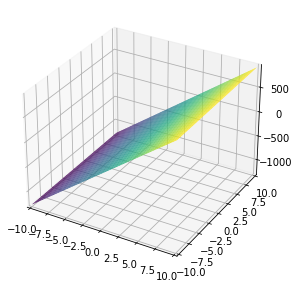

In [12]:
plot3d(y.subs({a2:koef[0], a1:koef[1], a0:koef[2]}));

In [13]:
def predict(feature,equation, koef):
    x_2, x_1 = feature
    a_2, a_1, a_0 = koef
    return float(equation.subs({x2 : x_2, x1: x_1, a2: a_2, a1:a_1, a0:a_0}))

In [14]:
predict([4, 500 ], y, koef)

666.6666666666666